In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

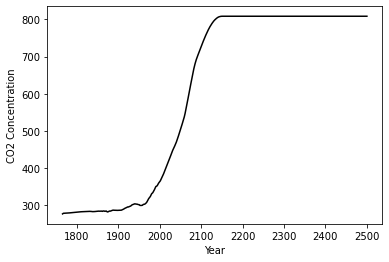

In [16]:
RCP6_concentration = pd.read_csv('RCP6_MIDYR_CONC.DAT', header=33, sep='\s+')
RCP6_concentration = RCP6_concentration[['YEARS', 'CO2EQ']]

plt.plot(RCP6_concentration.iloc[:,0], RCP6_concentration.iloc[:,1], c='k')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration')
plt.show()

In [36]:
historical_data = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
historical_data

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23703,ZWE,Zimbabwe,2015,12.170,1.653,0.198,13.308,1.138,9.350,0.881,...,4.885,11.87,0.859,6.68,0.484,NaN,NaN,NaN,13815000.0,2.503057e+10
23704,ZWE,Zimbabwe,2016,10.815,-11.139,-1.356,12.171,1.356,12.542,0.771,...,4.703,11.92,0.850,6.55,0.467,NaN,NaN,NaN,14030000.0,2.515176e+10
23705,ZWE,Zimbabwe,2017,10.247,-5.251,-0.568,11.774,1.527,14.902,0.720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14237000.0,NaN
23706,ZWE,Zimbabwe,2018,11.341,10.674,1.094,12.815,1.475,13.006,0.785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14439000.0,NaN


In [130]:
RCP6_emissions = pd.read_excel('rcp_db.xls')
RCP6_emissions = RCP6_emissions.iloc[0:1,4:-1]
RCP6_emissions = RCP6_emissions.stack()
# RCP6_emissions is now a Series
years = list(RCP6_emissions.index.values)
years = [value[1] for value in years]
RCP6_emissions = pd.DataFrame(data={'Year': years, 'CO2': list(RCP6_emissions)})
RCP6_emissions

# np.savetxt(r'c:\data\RCP6_emissions.txt', RCP6_emissions.values, fmt='%.4e')


,Year,CO2
0,2000,7.8838
1,2005,9.1665
2,2010,9.3889
3,2020,9.3567
4,2030,9.4379
5,2040,10.8403
6,2050,12.5800
7,2060,14.5660
8,2070,16.4767
9,2080,17.5247


In [108]:
ssp = pd.read_csv('https://raw.githubusercontent.com/csun365/EPS-03/main/SSP_IAM_V2_201811.csv')

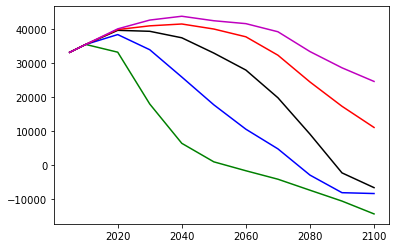

In [109]:
ssp1 = ssp[(ssp['VARIABLE']=='Emissions|CO2') & (ssp['REGION']=='World') & (ssp['MODEL']=='IMAGE')]
ssp1 = ssp1.reset_index(drop=True).iloc[:5,:]

years_list = np.array([2005])
years_list = np.append(years_list, [np.arange(2010, 2110, 10)])
ssp1_19 = [value for value in ssp1.loc[0,'2005':]]
ssp1_26 = [value for value in ssp1.loc[1,'2005':]]
ssp1_34 = [value for value in ssp1.loc[2,'2005':]]
ssp1_45 = [value for value in ssp1.loc[3,'2005':]]
ssp1_baseline = [value for value in ssp1.loc[4,'2005':]]

plt.plot(years_list, ssp1_19, c='g')
plt.plot(years_list, ssp1_26, c='b')
plt.plot(years_list, ssp1_34, c='k')
plt.plot(years_list, ssp1_45, c='r')
plt.plot(years_list, ssp1_baseline, c='m')
plt.show()


In [ ]:
# Titles of the models 
models = []
for model in ssp['MODEL']:
    if not model in models:
        models.append(model)
models